In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("movies.csv")

In [4]:
df

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin..."


In [5]:
# Combine wiki_plot and imdb_plot
df['plot'] = df['wiki_plot'].astype(str) + "\n" + \
                 df['imdb_plot'].astype(str)
df.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [6]:
import nltk
# Tokenize a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

In [7]:
sent_tokenized

["\n                        Today (May 19, 2016) is his only daughter's wedding.",
 'Vito Corleone is the Godfather.']

In [8]:
# Import the SnowballStemmer sub-module from the nltk.stem.snowball module
from nltk.stem.snowball import SnowballStemmer

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Print filtered to observe words without stemming
print("Without stemming: ", filtered)

# Stem the words from filtered and store in stemmed_words
stemmed_words = [stemmer.stem(word) for word in filtered]

# Print the stemmed_words to observe words after stemming
print("After stemming:   ", stemmed_words)

Without stemming:  ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']
After stemming:    ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered]

In [10]:
lemmatized_words

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

In [11]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for text in nltk.word_tokenize(text) for word in nltk.word_tokenize(text)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [12]:
# Define a function to perform both stemming and tokenization
def tokenize_and_lemm(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for text in nltk.word_tokenize(text) for word in nltk.word_tokenize(text)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    lemms = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return lemms

words_lemmed = tokenize_and_lemm("Today (May 19, 2016) is his only daughter's wedding.")
print(words_lemmed)

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']


In [13]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df["plot"]])

C:\Users\ameya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\ameya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 't

#### In the sparse matrix representation, each entry (i, j) v represents the term j in document i with a TF-IDF value v.
#### This means that the term with index j (from the vocabulary) appears in document i with the TF-IDF value of v.

In [15]:
print(tfidf_matrix.shape,tfidf_matrix)

(100, 564)   (0, 4)	0.015831701297516244
  (0, 549)	0.016115513026287907
  (0, 87)	0.013151055157781973
  (0, 168)	0.01126884481757805
  (0, 208)	0.04749510389254873
  (0, 555)	0.015831701297516244
  (0, 428)	0.08481157767746697
  (0, 1)	0.04667991117270058
  (0, 343)	0.06019568282532202
  (0, 108)	0.012140840357375384
  (0, 287)	0.015831701297516244
  (0, 299)	0.013526734839924769
  (0, 306)	0.009005176774380562
  (0, 418)	0.015299333687951935
  (0, 37)	0.011836748952672995
  (0, 15)	0.013336132249825746
  (0, 222)	0.010747354063462606
  (0, 447)	0.013151055157781973
  (0, 438)	0.008285009961196672
  (0, 24)	0.013723203036871207
  (0, 498)	0.016412529956466658
  (0, 82)	0.012298495592215509
  (0, 484)	0.029151525204875343
  (0, 169)	0.02525197707082088
  (0, 200)	0.015559970390900194
  :	:
  (99, 384)	0.08619640541457027
  (99, 358)	0.07672891325500265
  (99, 177)	0.20333482818614418
  (99, 368)	0.09393190975382117
  (99, 215)	0.13192312316278199
  (99, 439)	0.06821489514982466
  (99,

In [16]:
# now we take these documents and form their clusters using k-means algorithm clusturing is done is higher dimensions using euclidian distance.

In [17]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
df["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
df['cluster'].value_counts() 

cluster
1    35
3    23
4    21
2    18
0     3
Name: count, dtype: int64

In [18]:
df['cluster']

0     4
1     2
2     4
3     4
4     1
     ..
95    1
96    1
97    1
98    1
99    0
Name: cluster, Length: 100, dtype: int64

In [30]:
clusters = df.groupby('cluster')['title'].apply(list)
print(clusters)

cluster
0            [Amadeus, Nashville, Yankee Doodle Dandy]
1    [Casablanca, One Flew Over the Cuckoo's Nest, ...
2    [The Shawshank Redemption, Titanic, Lawrence o...
3    [Gone with the Wind, Citizen Kane, On the Wate...
4    [The Godfather, Schindler's List, Raging Bull,...
Name: title, dtype: object


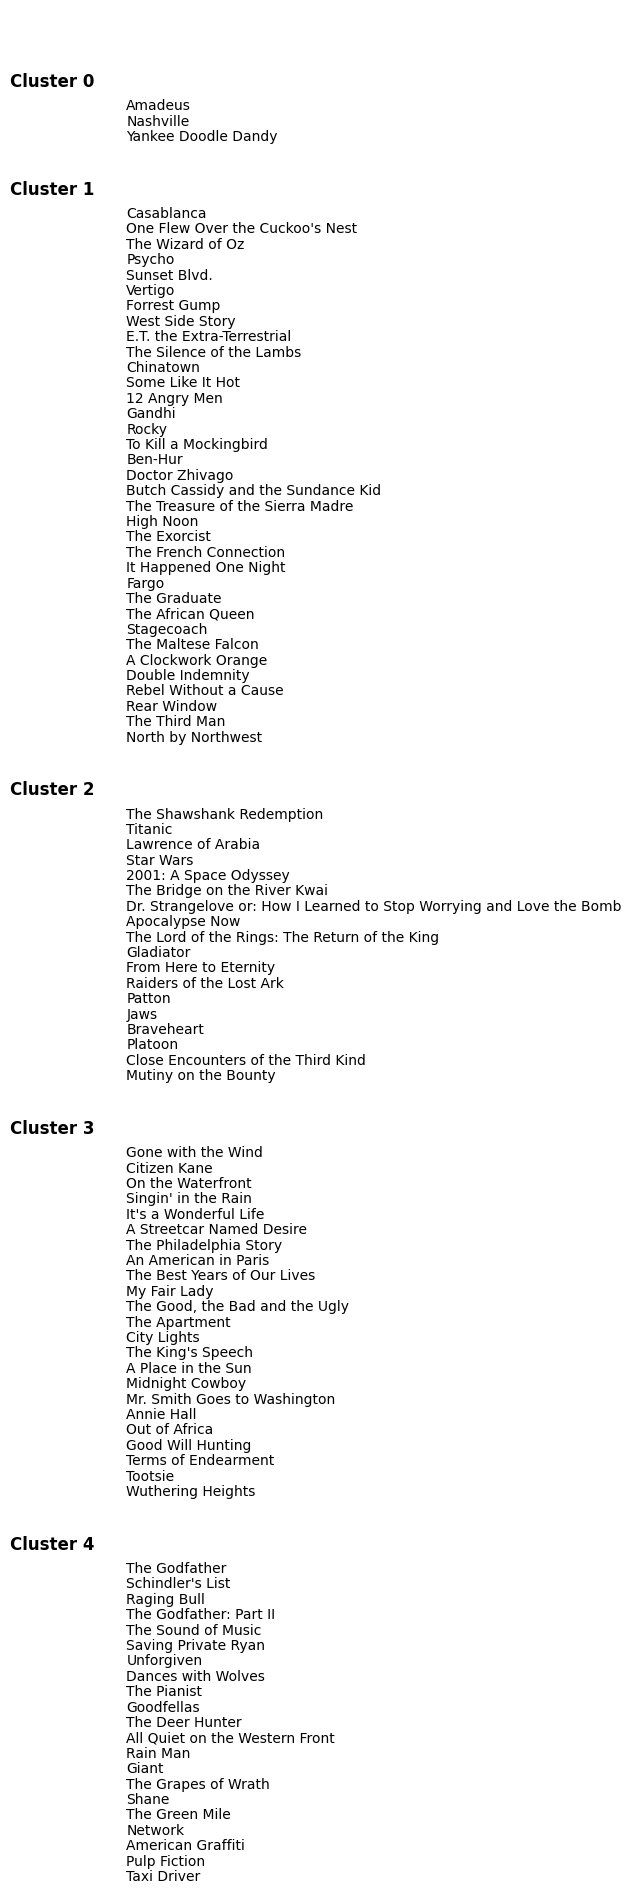

In [35]:
plt.figure(figsize=(3, 1))

# Iterate over clusters and plot
y_position = 0
for cluster_id, titles in clusters.items():
    # Plot cluster heading
    plt.text(0, y_position, f"Cluster {cluster_id}", fontsize=12, fontweight='bold')
    y_position -= 0.3  # Adjust vertical spacing for titles
    
    # Plot titles in the cluster
    for title in titles:
        plt.text(0.5, y_position, title, fontsize=10)
        y_position -= 0.2
    
    y_position -= 0.5  # Adjust spacing between clusters

# Remove axes
plt.axis('off')

# Show plot
plt.show()

#### Consider the following two sentences from the movie The Wizard of Oz:

#### "they find in the Emerald City"

#### "they finally reach the Emerald City"

#### If we put the above sentences in a CountVectorizer, the vocabulary produced would be "they, find, in, the, Emerald, City, finally, reach" 
#### and the vectors for each sentence would be as follows:

#### 1, 1, 1, 1, 1, 1, 0, 0

#### 1, 0, 0, 1, 1, 1, 1, 1 ###

In [20]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [21]:
#similarity_distance is a matrix where each row is compared with other row where diagonal elements would be zero

In [22]:
# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

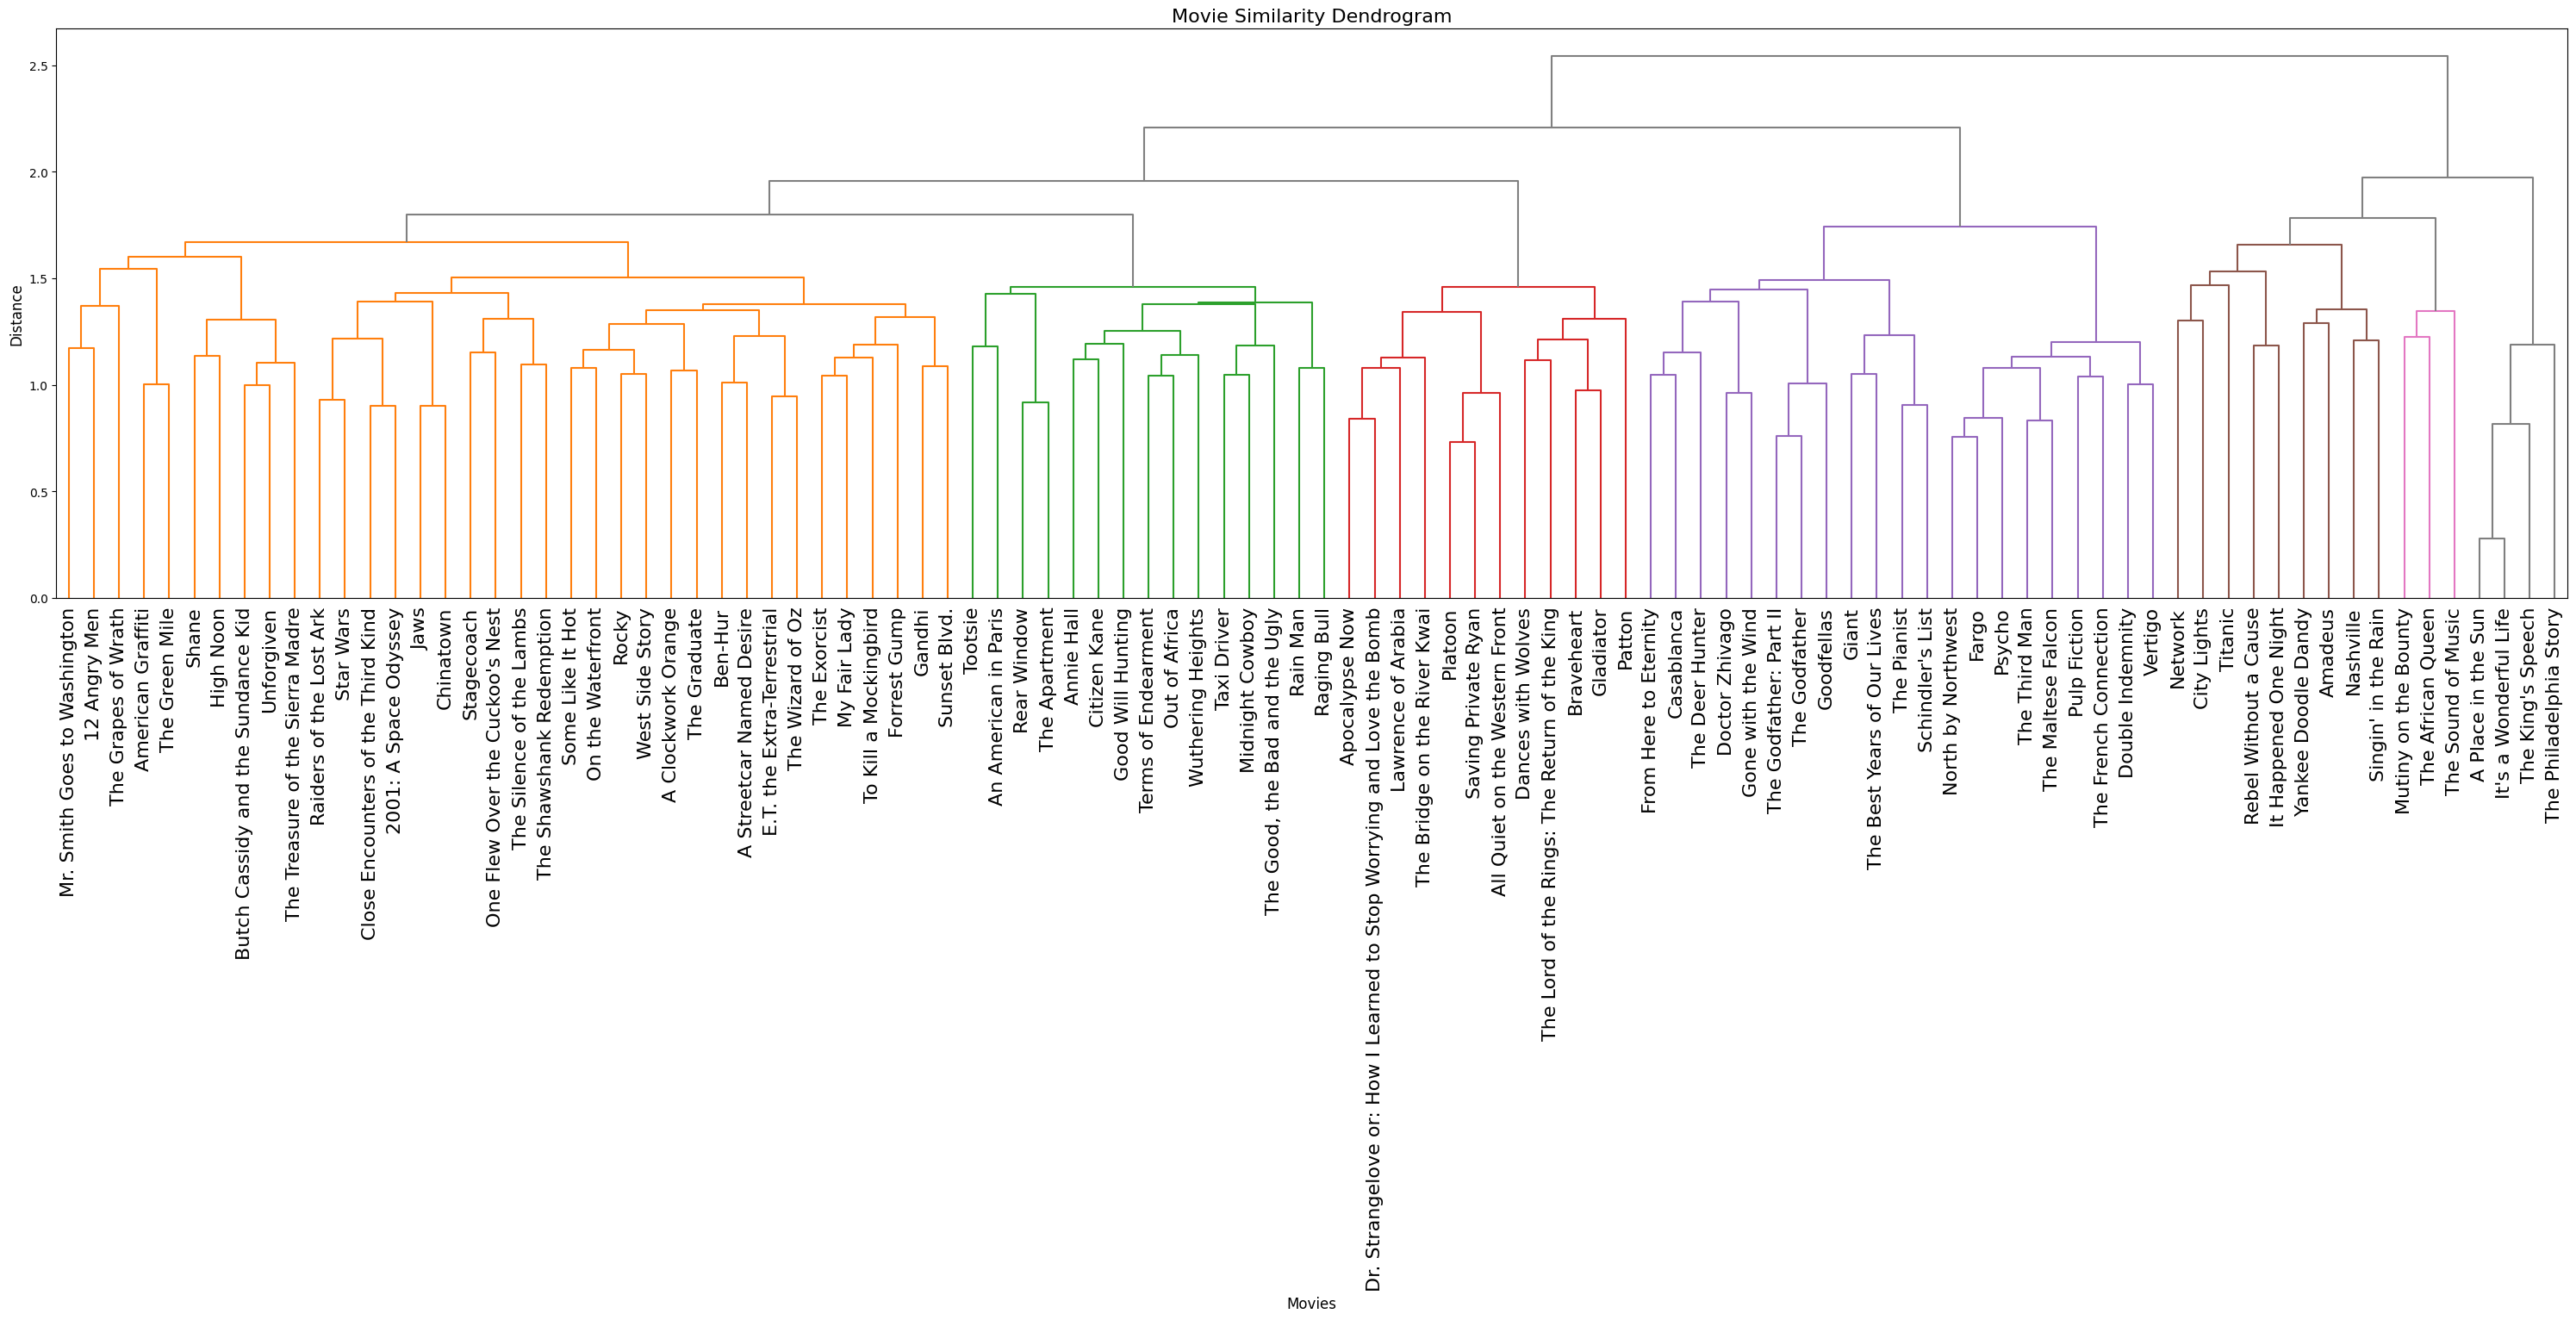

In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Calculate a suitable figure size based on the number of samples
n_samples = len(df["title"])
fig_width = max(20, n_samples * 0.3)  # Adjust this multiplier as needed
fig_height = 10  # Fixed height

# Create the figure
plt.figure(figsize=(fig_width, fig_height))

# Plot the dendrogram with adjusted parameters
dendrogram_ = dendrogram(mergings,
               labels=[x for x in df["title"]],
               leaf_rotation=90,
               leaf_font_size=8,  # Adjusted font size
               color_threshold=0.7 * max(mergings[:, 2]),
               above_threshold_color='grey',
               orientation='top',  # Change orientation
               distance_sort='descending',
               show_leaf_counts=False,
)

# Adjust the plot
plt.title('Movie Similarity Dendrogram', fontsize=16)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Rotate and align the tick labels
plt.tick_params(axis='x', which='major', labelsize=16, rotation=90)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Add extra space at the bottom for labels
plt.subplots_adjust(bottom=0.3)

# Show the plotted dendrogram
plt.show()